In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

##### Import the data and name the columns

In [4]:
data_path = ("C:/Users/yakan/OneDrive/Documents/Thinkful/DS_Bootcamp/U2/sentiment labelled sentences/imdb_labelled.txt")
raw_data = pd.read_csv(data_path, sep = '\t', header = None, index_col = None)

In [5]:
raw_data.columns = ['original_text', 'classifier']

In [6]:
raw_data.head()

,original_text,classifier
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [7]:
!pip3 install nltk

You are using pip version 19.0.3, however version 19.2.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
# Load library
#from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yakan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
#from chrisalbon.com
#load library
from nltk.corpus import stopwords
#nltk.download('stopwords')
stopwords.words('english') #works :) and loads ALL language stop words. See below on how to just get English

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

##### Make a list of keywords that would signify positive sentiment in the comment. Also there are some string patterns, such as 'cool' and 'rivet' that may suggest the precense of a word that conveys positive sentiment - include them as indicators as well.

Also, since the outcome is already coded in binary, there is no need to recode that column.

In [10]:
#removing stop words
#create a word cloud (make all the words lower case first)
raw_data['original_text'] = raw_data['original_text'].str.lower()

In [11]:
#id keywords for positive sentiment
keywords = ['fun', 'amazing', 'bad']
for key in keywords:
    raw_data[str(key)] = raw_data['original_text'].str.contains(
    ' ' + str(key) + ' ',
    case = False
    )

In [12]:
#just in case any of these words are followed by punctuation
other_words = ['rivet', 'cool', 'great', 'joy', 'excellent', 'good', 'best', 'delivers',
              'terrible', 'not good', ' thmubs down', 'awful']
for word in other_words:
    raw_data[str(word)] = raw_data['original_text'].str.contains(str(word), case = False)

In [13]:
#add some punctuation that might be useful
raw_data['exclamation'] = raw_data['original_text'].str.contains('!')
raw_data['smiley'] = raw_data['original_text'].str.contains(':)', regex = False)

In [14]:
raw_data.head()

,original_text,classifier,fun,amazing,bad,rivet,cool,great,joy,excellent,good,best,delivers,terrible,not good,thmubs down,awful,exclamation,smiley
0,"a very, very, very slow-moving, aimless movie ...",0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,the best scene in the movie was when gerardo i...,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


##### Check that the new variables are not strongly correlated, because strong correlation isn't good in Naive Bayes.

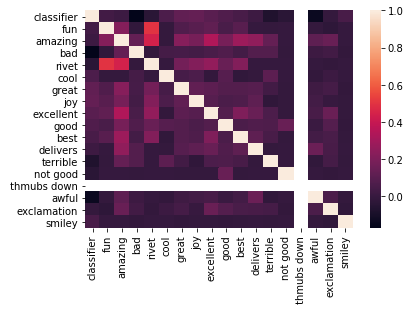

In [15]:
#check that variables are independent
sns.heatmap(raw_data.corr())

It seems like most of the variables are not correlated. The string pattern 'cool' and 'rivet' show some moderate correlation, as well as 'fun' and 'rivet.

##### Specify inputs and outcome

In [16]:
inputs = raw_data[keywords + other_words + ['exclamation'] + ['smiley']]
outcome = raw_data['classifier']

In [17]:
#import the Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB

#initiate the model and store it in a new variable
bnb = BernoulliNB() #initiate an empty model first. 
#Not initiating the modeland saving it as a new varaible won't be able to predict using that model

In [18]:
#fit model to the data
bnb.fit(inputs, outcome)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [19]:
#classify and store results in a new variable
y_pred = bnb.predict(inputs)

In [20]:
#display results
print('Number of mislabeled points out of a total {} points : {}'.format(
        inputs.shape[0], 
        (outcome != y_pred).sum()
))

print('Percent of mislabeled points: {}%'.format(
     ((outcome != y_pred).sum())/(inputs.shape[0])*100   
))

Number of mislabeled points out of a total 748 points : 300
Percent of mislabeled points: 40.106951871657756%


##### Unfortunately, the prediction is not very good. Close to 41% of the outcomes are mislabeled, which means that around 59% are correctly identified, which is only slightly better than flipping a coin. 

##### Adding the exclamation point indicator and the smiley indicator did not increase the accuracy, so they won't be included in the future.

##### Check if it's better on the other data set.

In [21]:
new_path = ("C:/Users/yakan/OneDrive/Documents/Thinkful/DS_Bootcamp/U2/sentiment labelled sentences/yelp_labelled.txt")
other_data = pd.read_csv(data_path, sep = '\t', header = None, index_col = None)
other_data.columns = ['original_txt', 'classifier']

In [22]:
#id keywords for positive sentiment
keywords = ['fun', 'amazing']
for key in keywords:
    other_data[str(key)] = other_data['original_txt'].str.contains(
    ' ' + str(key) + ' ',
    case = False
    )

In [23]:
#just in case any of these words are followed by punctuation
other_words = ['rivet', 'cool', 'great', 'joy', 'excellent', 'good', 'best', 'delivers']
for word in other_words:
    other_data[str(word)] = other_data['original_txt'].str.contains(str(word), case = False)

In [24]:
inputs = other_data[keywords + other_words]
outcome = other_data['classifier']

#import the Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB

#initiate the model and store it in a new variable
bnb = BernoulliNB()

#fit model to the data
bnb.fit(inputs, outcome)

#classify and store results in a new variable
y_pred = bnb.predict(inputs)

#display results
print('Number of mislabeled points out of a total {} points : {}'.format(
        inputs.shape[0], 
        (outcome != y_pred).sum()
))

print('Percent of mislabeled points: {}%'.format(
     ((outcome != y_pred).sum())/(inputs.shape[0])*100   
))

Number of mislabeled points out of a total 748 points : 306
Percent of mislabeled points: 40.909090909090914%


##### The classification accuracy on the new data set is equally as poor.

##### Check different parameters of the Bernoulli Classifier to pick out the best one and see if it improves model accuracy.

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
parameters = {'alpha':[0.1, 1, 5, 10]}
bernoulli_classifier = BernoulliNB()
clf = GridSearchCV(bernoulli_classifier, parameters)
clf.fit(inputs , outcome)

c:\users\yakan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 1, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [27]:
clf.best_params_

{'alpha': 0.1}

In [28]:
inputs = other_data[keywords + other_words]
outcome = other_data['classifier']

#import the Bernoulli classifier
from sklearn.naive_bayes import BernoulliNB

#initiate the model and store it in a new variable
bnb = BernoulliNB(alpha = 0.1)

#fit model to the data
bnb.fit(inputs, outcome)

#classify and store results in a new variable
y_pred = bnb.predict(inputs)

#display results
print('Number of mislabeled points out of a total {} points : {}'.format(
        inputs.shape[0], 
        (outcome != y_pred).sum()
))

print('Percent of mislabeled points: {}%'.format(
     ((outcome != y_pred).sum())/(inputs.shape[0])*100   
))

Number of mislabeled points out of a total 748 points : 306
Percent of mislabeled points: 40.909090909090914%


In [ ]:
#unfortunately changing the alpha parameter did not improve the classifier that much.